![Image of Cms Detector](cms.png)
 
<p style="margin-right:8%; margin-left:8%; font-size:28px; font-weight: 200; line-height: 1.5em">
** Start an Analysis in Experimental Particle Physics (1) **

## From Basic Check of Muons to the Observation of the Production of Z Bosons

In this example you will learn: 

* How to use the ROOT "tree" structure of the information of particles in events measured in the CMS detector

* How to define and apply a selection criteria on the events collected using the information of the particles detected

* How to fill a histogram with the information selected and analyze the distribution of an observable

Let's start!

There is already a simplified NTuple version of the original data created to perform the following exercise and named **mytree.root**. It coints the minimum information to work with. If you need to include more information you can create your own NTuple by following the instructions under [Part0: create your own NTuple from the CMS Open Data.](https://cmsopendata.ifca.es/jupyter/notebooks/tutorials/Part0.V2.ipynb).


We have prepared a basic script that shows you how to make a loop to read the information of 
all the particles on these events and then perform a simple analysis: [**Analyzer_All.py**](https://cmsopendata.ifca.es/jupyter/edit/Analyzer_Package/Analyzer_All.py). 

You can have a look to the code and understand what is done:

   * The class AnalyzerAll is inherited from the class [**Analyzer**](https://cmsopendata.ifca.es/jupyter/edit/AnalysisDesigner/Analyzer.py). 
   
   * For each event (collision) we read the information for all the muons reconstructed (if any).   
  
   * We store in a local variable all the information available for each muon: the momentum (pt, px, ..), geometrical coordinates (eta, phi) and all the variables needed for the identification and isolation.

   * We create different **histograms** for all the variables associated to each muon and that can be shown as a **plot**.

   * We can also compute new observables, like the invariant mass of two muons, and also plot it.
   
The aim of this exercise is that you explore the muons detected in the events and also 
have a first look to see if some of these muons could come from the decay of a Z boson.

**NOTE:** 

For each exercise,you need to import the **ROOT** package to run the code and you have to use our "default" area for analysis.

In [ ]:
# Import ROOT (ROOT is a analysis package used to handle the tree files, but also histograms, etc.)
import ROOT

In [ ]:
cd /home/jupyter/CmsOpenData/AnalysisDesigner

* ### Run the Analysis for All muons
<p style="margin-right:0%; margin-left:0%; font-size:14px; font-weight: 200; line-height: 1.2em">

Now we will perform the analysis for all muons, running the module **Analyzer_All.py**, and producing the histograms that are saved in a file **histos.root** that will be stored in the **datafiles** folder. 
Each histogram is saved with a name started by *h_* followed by the *name of the kinematic variable* (---> aqui hay que poner la explicacion de las variables o algo.... veremos).

   * The main Analysis will be running in a sequential way:
        - First, load the tree with all events
        - Get the tree from this file by its name = muons
        - Create a instance of the analysis
        - Asociate the branches to the variables used by the Analysis
        - Finally, Make the analysis:
            - **beginJob**: Define the histograms and create the file where the histograms will be saved
            - loop over all events of the tree and process each of them
            - **endJob**: Write the histograms in the histos file
        

In [16]:
# Import the main module which run the analysis for ALL particles
from Analyzer_All import AnalyzerAll

# Instance of AnalyzerAll
analysis = AnalyzerAll()

In [17]:
#Loop over events
#--------------------------------------------------------------------

#Specify the output file name
analysis.beginJob("histos.root")

print "Start the Analysis"

# For each event or entry, the following loop read all the tree branches, creates every muon and add it to all_muons list
for event in range(0, analysis.numEntries):
        analysis.process(event)
analysis.endJob()

*** Begin job
Start the Analysis
*** writing file <ROOT.TFile object ("datafiles/histos.root") at 0x51a9470>
*** done


* ### Check your h_histogram
<p style="margin-right:0%; margin-left:0%; font-size:14px; font-weight: 200; line-height: 1.2em">

Open the histos.root file for reading and printing the list of histograms saved in it.

In [18]:
# Get the root file that contains the histograms for all muons: histos.root.
Hfile=ROOT.TFile("datafiles/histos.root", "read")

# List the histograms stored in the file
Hfile.ls()


TFile**		datafiles/histos.root	
 TFile*		datafiles/histos.root	
  KEY: TH1F	h_pt;1	Muons Transverse Momentun
  KEY: TH1F	h_px;1	Muons x- Momentun
  KEY: TH1F	h_py;1	Muons y- Momentun
  KEY: TH1F	h_pz;1	Muons z- Momentun
  KEY: TH1F	h_eta;1	Angle Transvese
  KEY: TH1F	h_energy;1	Muons Energy
  KEY: TH1F	h_distance;1	Distance from Primary vertex Z 
  KEY: TH1F	h_charge;1	Muons Charge
  KEY: TH1F	h_normChi2;1	Muons Chi2
  KEY: TH1F	h_numberOfValidHits;1	Number of Valid Hits
  KEY: TH1F	h_dB;1	Impact Parameter
  KEY: TH1F	h_isolation_sumPt;1	IsolationX
  KEY: TH1F	h_isolation_emEt;1	IsolationX
  KEY: TH1F	h_isolation_hadEt;1	IsolationX
  KEY: TH1F	h_mass;1	MassInv


 * ### Learn the kinematic variables
<p style="margin-right:0%; margin-left:0%; font-size:14px; font-weight: 200; line-height: 1.2em">

Here you have a set of varibles and the name used to save their histogram:

             - momentum trensverse pt :                               'h_pt'
             - momentum X-coordinate px:                              'h_px'
             - momentum Y-coordinate py:                              'h_py'
             - momentum Z-coordinate pz:                              'h_pz' 
             - angle transverse eta :                                 'h_eta'
             - energy :                                               'h_energy'
             - charge :                                               'h_charge'
             - distance between particle Z-coord and Primary Vertex : 'h_distance'
             - impact paremeter dB:                                   'h_dB'
             - isolation:                                             'h_isolation'
             - invariant mass:                                        'h_mass'
             - normalize Chi2 normChi2:                               'h_normChi2'
             - numValidHits :                                         'h_numberOfValidHits'

* ### Draw Histos
<p style="margin-right:0%; margin-left:0%; font-size:14px; font-weight: 200; line-height: 1.2em">

Once you have that file,  the next step is to plot the histogram. Here, we detail some procedures  
* #### First method: 

<p style="margin-right:0%; margin-left:0%; font-size:15px; font-weight: 200; line-height: 1.2em">

**1.**         Create a ROOT  canvas and draw the histogram on it. 

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: myCanvas


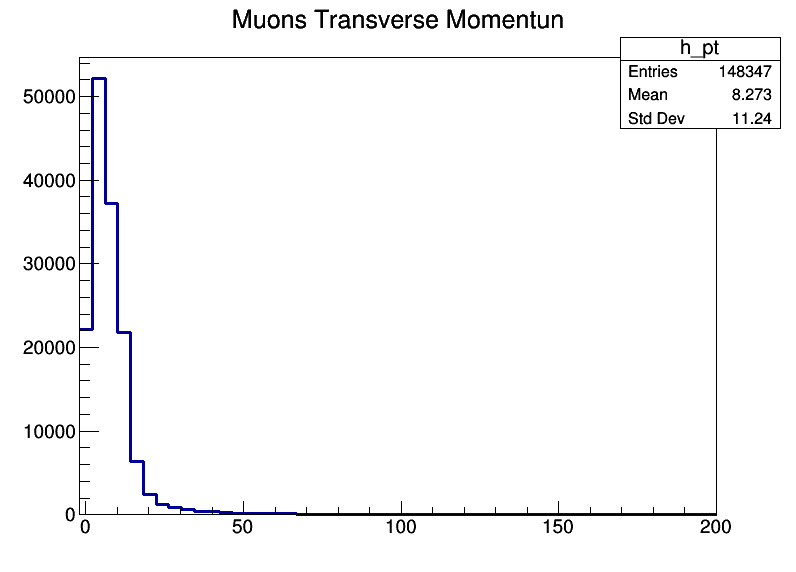

In [19]:
### Get the root file that contains the histograms for all muons: histos.root.
Hfile=ROOT.TFile("datafiles/histos.root", "read")

### You must create a variable to store the histogram selected.
histo1=Hfile.Get('h_pt')

### First: Create the canvas where the histogram is going to be drawn
canvas = ROOT.TCanvas("myCanvas","All muons: NormChi2",800,600)

### Second: Draw the histogram
histo1.Draw()

### Third : Draw the canvas
canvas.Draw()

**2.** Set your favorite configuration. 

Once you have created the variable where the histogram is stored, and after drawing it, you can set the histogram and the canvas for a better customization. 

References:

[Tcolor Class](https://root.cern.ch/doc/master/classTColor.html)

[Histogram Customization](https://root.cern.ch/doc/v606/classTHistPainter.html)

[Marker Atributtes such as color, size or style for histograms](https://root.cern.ch/doc/master/classTAttMarker.html)

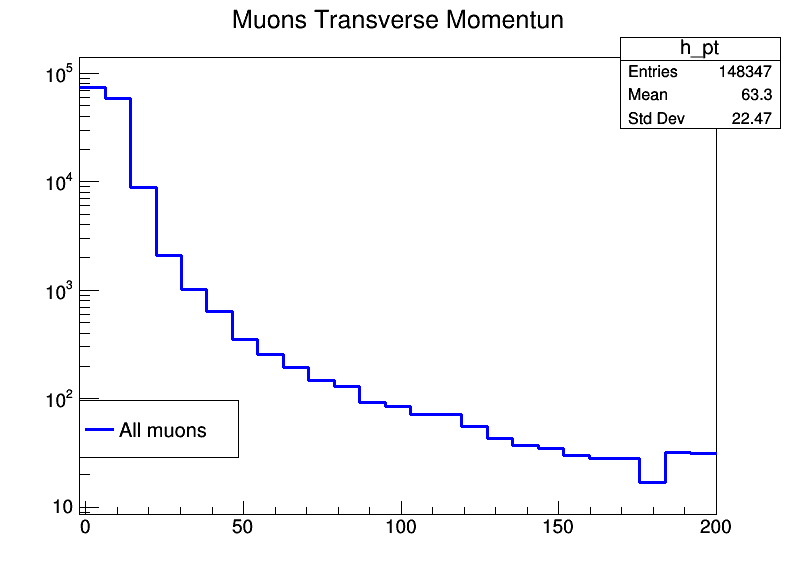

In [20]:
### Change the line color
histo1.SetLineColor(4)

### Change the bounds of the histograms for X Axis 
histo1.GetXaxis().SetRangeUser(40, 120);

### Change the bins for the histograms by diving by a divisor of the initial number of bins. 
## Note: To restore the binning you must to draw the histo again.
histo1.Rebin(2)

### Create the legend. TLegend(x1, y1, x2, y2)
legend =ROOT.TLegend(0.1,0.2,0.30,0.3);
#legend.SetHeader("Title");
legend.AddEntry(histo1,"All muons","l");
#legend->AddEntry("gr","Graph with error bars","lep");
legend.Draw();

### Twist linear scale for Y axe to the logaritmic one with the function SetLogy.
canvas.SetLogy()

### Draw the histogram again and check your changes 
canvas.Draw()

**3.**         Save the image in a .png file. 

The previous procedure does not save the image automatically, it just shows you the picture. This statement can be written before or after stablish your favorite setting. Hence, you can collect both histograms for the analysis. 

In [23]:
# If you want keep it, you must type: 
# NOTE: Write the name of the file 

name = "pt"
canvas.SaveAs("../output_histograms/"+ name +".png")

# This save the image as a .png file.

Info in <TCanvas::Print>: png file ../output_histograms/pt.png has been created


** 4.1.** And set again your preferences. ** PAY ATTENTION :** some settings are applied on the histo variable some others on the canvas.  